# Изучение оттока пользователей фитнес-центра

## Описание проекта

Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 
Отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество анкет пользователей. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.

А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

## Описание данных:
* 'Churn' — факт оттока в текущем месяце;
* Текущие поля в датасете:
    * Данные пользователя за предыдущий до проверки факта оттока месяц:
        * 'gender' — пол
        * 'Near_Location' — проживание или работа в районе, где находится фитнес-центр
        * 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
        * Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента)
        * 'Phone' — наличие контактного телефона
        * 'Age' — возраст
        * 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах)
         
    * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента
         * 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)
         * 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах)
         * 'Group_visits' — факт посещения групповых занятий
         * 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента
         * 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц
         * 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон
         
## План проекта:
* Шаг 1. Загрузите данные

* Шаг 2. Проведите исследовательский анализ данных (EDA)
    * Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
    * Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
    * Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
    * Постройте матрицу корреляций и отобразите её.
    
* Шаг 3. Постройте модель прогнозирования оттока пользователей
Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце:
    * Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
    * Обучите модель на train-выборке двумя способами:
        * логистической регрессией
        * случайным лесом
    * Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
    
* Шаг 4. Сделайте кластеризацию пользователей
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):
    * Стандартизируйте данные.
    * Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
    * Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
    * Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
    * Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
    * Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?
    
* Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с пользователями и их удержания.

# Шаг 1.Открыть файл с данными и изучить общую информацию.
Загрузим библиотеки и датасет

In [1]:
# импортируем библиотеки
import pandas as pd
import math as mth
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# прочитаем файлы:

try:
    df = pd.read_csv('gym_churn.csv', sep=',')

except:
    try:
        df = pd.read_csv('/datasets/gym_churn.csv', sep=',')

    except:
        df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv', sep=',')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Видим, что названия столбцов начинается с верхнего регистра. Пропусков нет.

In [6]:
df['gender'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64

Видим, что один пол незначительно преобладает над другим

In [7]:
df['Near_Location'].value_counts()

1    3381
0     619
Name: Near_Location, dtype: int64

Видим, что в основном клиенты живут в тех же районах где распологается спортивный зал

In [8]:
df['Partner'].value_counts()

0    2053
1    1947
Name: Partner, dtype: int64

Видим, что преобладают клиент не являющиеся сотрудниками компаний-партнера клуба

In [9]:
df['Promo_friends'].value_counts()

0    2766
1    1234
Name: Promo_friends, dtype: int64

Видим, что клиентов пришедших по промокоду в 2 раза меньше

In [10]:
df['Phone'].value_counts()

1    3614
0     386
Name: Phone, dtype: int64

Видим, что только у около 10% клиентов не указан номер

In [11]:
df['Contract_period'].value_counts()

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

Видим, что чуть больше половины клиентов купили абонемент на 1 месяц, остальная половина примерно поровну покупают на 6 и 12 месяцев

In [12]:
df['Group_visits'].value_counts()

0    2351
1    1649
Name: Group_visits, dtype: int64

Видим, что в основном клиенты посещают групповые занятия (около 60%)

In [13]:
df['Age'].value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: Age, dtype: int64

Видим, что преобладащее количество клиентов в возрасте около 30 лет

In [14]:
df['Avg_additional_charges_total'].describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: Avg_additional_charges_total, dtype: float64

Видим, что средняя суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон составляет 146 у.е.

In [15]:
df['Month_to_end_contract'].value_counts()

1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0       23
2.0       14
Name: Month_to_end_contract, dtype: int64

Видим, как и сообщалось ранее, клиенты предпочитают брать абонемент на 1 месяц

In [16]:
df['Lifetime'].value_counts()

1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
15     24
14     24
16     15
17     11
19      7
18      7
20      7
21      5
26      2
24      2
22      2
23      2
27      1
29      1
31      1
Name: Lifetime, dtype: int64

Видим, что в основном жизненный цикл клиента не превышает 12 месяцев

In [17]:
df['Avg_class_frequency_total'].describe()

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: Avg_class_frequency_total, dtype: float64

Видим, что среднее число посещений в неделю около 2 раз (1,9)

In [18]:
df['Avg_class_frequency_current_month'].describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: Avg_class_frequency_current_month, dtype: float64

Видим, что среднее число посещений в неделю по предыдущему месяцу также около 2 раз (1,8)

In [19]:
df['Churn'].value_counts()

0    2939
1    1061
Name: Churn, dtype: int64

Видим, что отток в текущем месяце составляет четверь клиентов 

In [20]:
# скорректируем названия столбцов
df.columns = df.columns.str.lower()

## Вывод
* один пол незначительно преобладает над другим
* в основном клиенты живут в тех же районах где распологается спортивный зал
* преобладают клиент не являющиеся сотрудниками компаний-партнера клуба
* клиентов пришедших по промокоду в 2 раза меньше
* только у около 10% клиентов не указан номер
* чуть больше половины клиентов купили абонемент на 1 месяц, остальная половина примерно поровну покупают на 6 и 12 месяцев
* что в основном клиенты посещают групповые занятия (около 60%)
* преобладащее количество клиентов в возрасте около 30 лет
* средняя суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон составляет 146 у.е.
* основном жизненный цикл клиента не превышает 12 месяцев
* среднее число посещений в неделю около 2 раз (1,9)
* среднее число посещений в неделю по предыдущему месяцу также около 2 раз (1,8)

# Шаг 2. Проведите исследовательский анализ данных (EDA)
## Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [21]:
df['gender'].describe()

count    4000.000000
mean        0.510250
std         0.499957
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

Как и сообщалось ранее, количество клиентов разного пола примерно одинаков, стандартное отклонение 0,5

In [22]:
df['near_location'].describe()

count    4000.000000
mean        0.845250
std         0.361711
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: near_location, dtype: float64

Около 85% клиентов прожживают или работаю в том же районе где находится спорт зал. Стандартное отклонение 0,36

In [23]:
df['partner'].describe()

count    4000.000000
mean        0.486750
std         0.499887
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: partner, dtype: float64

Около 49% клиентов - сотрудники компаний-партнера цитнес-центра. Станадартное отклонение 0,5

In [24]:
df['promo_friends'].describe()

count    4000.000000
mean        0.308500
std         0.461932
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: promo_friends, dtype: float64

Около 31% клиентов пришли по промо-коду. Стандартное отклонение 0,46

In [25]:
df['phone'].describe()

count    4000.000000
mean        0.903500
std         0.295313
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: phone, dtype: float64

Около 90% клиентов оставили телефонный номер в анкете. Стандартное отклонение 0,3

In [26]:
df['contract_period'].describe()

count    4000.000000
mean        4.681250
std         4.549706
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: contract_period, dtype: float64

Как сообщалось ранее, абонемент можно купить на 1, 6 или 12 месяцев. В среднем на одного клиента приходится период - 4,7 месяцев. Стандартное отклонение 4,6

In [27]:
df['group_visits'].describe()

count    4000.000000
mean        0.412250
std         0.492301
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: group_visits, dtype: float64

Около 41% клиентов ходят на групповые занятия, стандартное отклонение 0,49

In [28]:
df['age'].describe()

count    4000.000000
mean       29.184250
std         3.258367
min        18.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        41.000000
Name: age, dtype: float64

Средний возраст клиентов 29 лет, стандартное отклонение около 3,3 года

In [29]:
df['avg_additional_charges_total'].describe()

count    4000.000000
mean      146.943728
std        96.355602
min         0.148205
25%        68.868830
50%       136.220159
75%       210.949625
max       552.590740
Name: avg_additional_charges_total, dtype: float64

Средняя выручка от услуг фитнес-центра составлят 146,9 у.е. Стандартное отклонение 96,36 у.е

In [30]:
df['month_to_end_contract'].describe()

count    4000.000000
mean        4.322750
std         4.191297
min         1.000000
25%         1.000000
50%         1.000000
75%         6.000000
max        12.000000
Name: month_to_end_contract, dtype: float64

Средний срок истечения договора - 4,3 месяца. Стандартное отклонение 4,2 месяца.

In [31]:
df['lifetime'].describe()

count    4000.000000
mean        3.724750
std         3.749267
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        31.000000
Name: lifetime, dtype: float64

В среднем клиенты пришли 3,7 месяца назад. Стандартное отклонение 3,8 месяца

In [32]:
df['avg_class_frequency_total'].describe()

count    4000.000000
mean        1.879020
std         0.972245
min         0.000000
25%         1.180875
50%         1.832768
75%         2.536078
max         6.023668
Name: avg_class_frequency_total, dtype: float64

Как сообщалось ранее среднее количество посещений клиента в неделю составляет почти 2 раза (1,9). Стандартное отклонение 0,97

In [33]:
df['avg_class_frequency_current_month'].describe()

count    4000.000000
mean        1.767052
std         1.052906
min         0.000000
25%         0.963003
50%         1.719574
75%         2.510336
max         6.146783
Name: avg_class_frequency_current_month, dtype: float64

Как сообщалось ранее среднее число посещений в неделю по предыдущему месяцу также около 2 раз (1,8). Стандратное отклонение 1,05

In [34]:
df['churn'].describe()

count    4000.000000
mean        0.265250
std         0.441521
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

Как сообщалось ранее, отток в текущем месяце составляет 26,5%. Стандартное отклонение 0,44

## Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [35]:
df.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* Ушло примерно одинаковое количество мужчин и женщин, оставшихся примерно такая же пропорция
* Примерно 77% ушедших киентов жили/работали в том же районе, что и находится фитнес-центр, против 87% - оставшихся
* 18% из ушедших пришли по промокоду, оставшиеся - 35%
* У 90% оставшихся и ушедших указан номер телефона
* В среднем у оставшегося клиента длительность договора составляет 5,8 месяцев, а у ушедших - 1,7
* Оставшиеся клиенты больше посещают групповые занятия - 46,4%, против 26,9% у ушедших
* Средний возраст оставшизся - 30 лет, ушедших - 27
* Средние траты у первой группы - 158,45 у.е, у второй - 115,08 у.е
* У первой категории клиентов в среднем договор заканчивается через 5,3 месяца, в второй - 1,7
* Лайфтайм клиента для оставшихся - 4,7 месяцев, ушедших - 1
* В среднем оставшиеся клиенты ходят 2 раза в неделю за весь период, чем ушедшие - 1,5 раз
* В среднем оставшиеся клиенты ходят 2 раза в неделю за последний месяц, чем ушедшие - 1 раз

## Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [36]:
df_churn_0 = df.query('churn == 0') # сформируем срез для оставшихся клиентов
df_churn_1 = df.query('churn == 1') # сформируем срез для отточных клиентов
columns = df.drop(columns=['churn']).columns.tolist() # переменная для цикла. Содержит названия столбцов за исключением признака оттока

def create_hist(df, columns):
    for i in columns:
        plt.figure(figsize =(10, 4)) # задаем размер графика
        sns.histplot(df[i]) # строим график
        plt.title(f'Распределение признака {i}') # название графика
        plt.xlabel('Значение') # подпись Оси Х
        plt.ylabel('Частота') # подпись Оси Y
        plt.grid() # сетка на графике
        plt.show() 

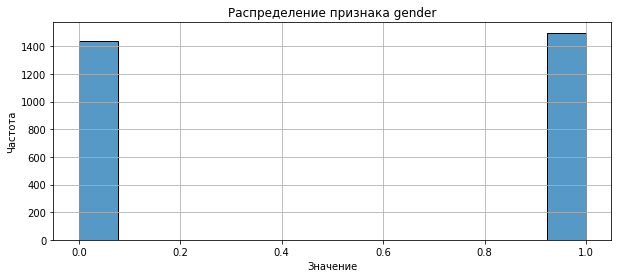

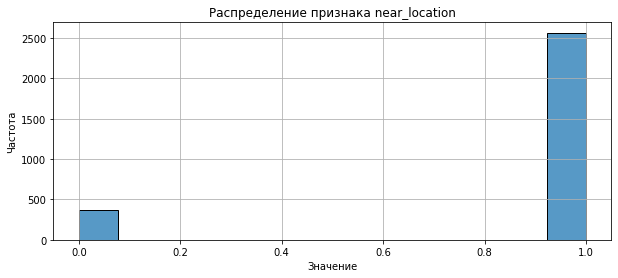

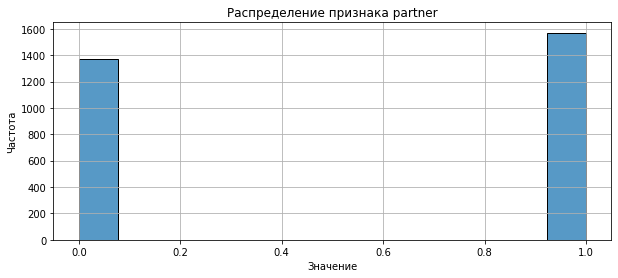

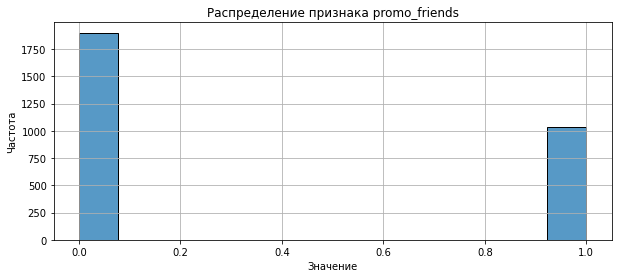

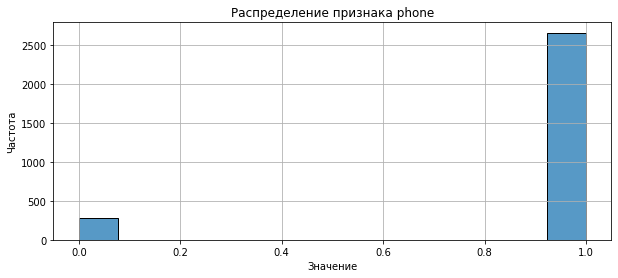

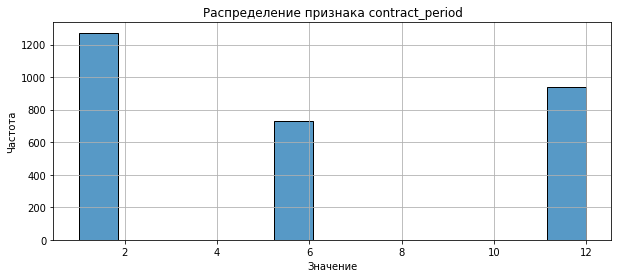

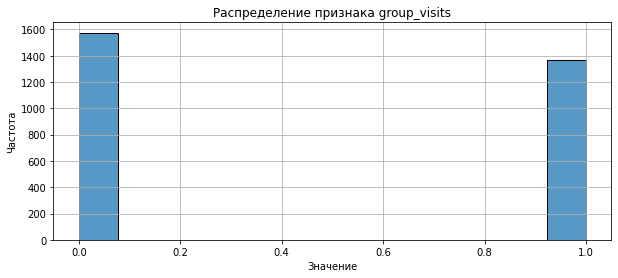

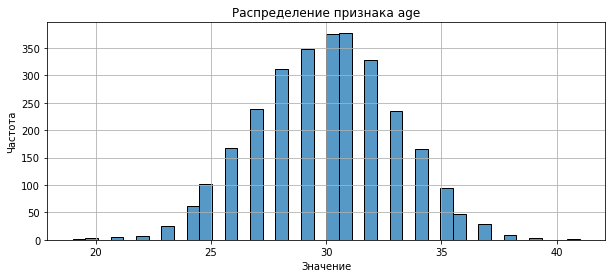

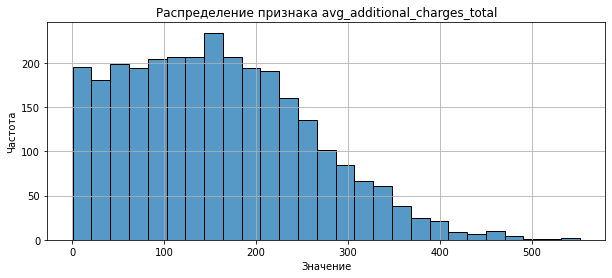

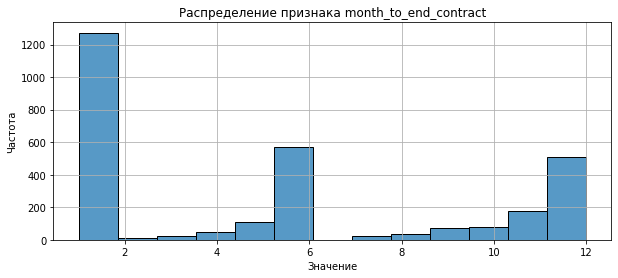

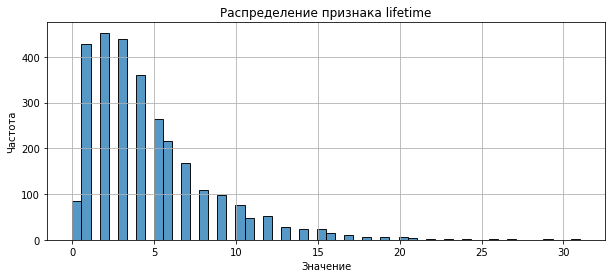

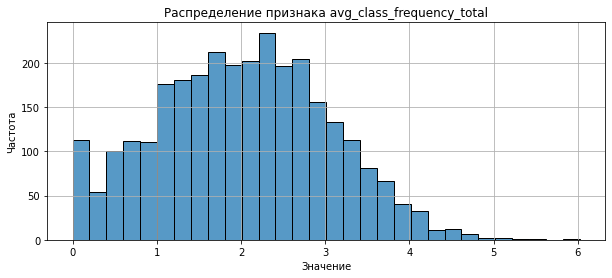

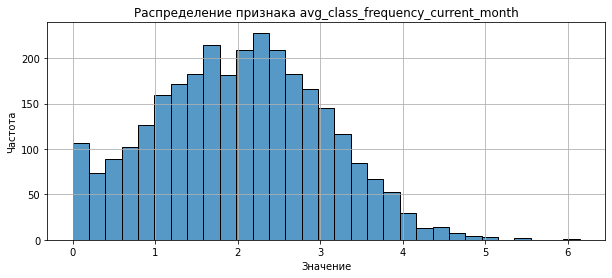

In [37]:
# построим графики для оставшихся клиентов
create_hist(df_churn_0, columns)

Все ранее сделанные выводы подтверждаются графиками

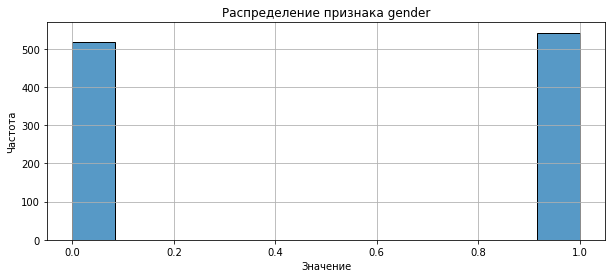

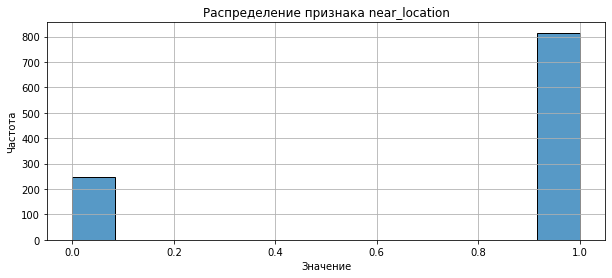

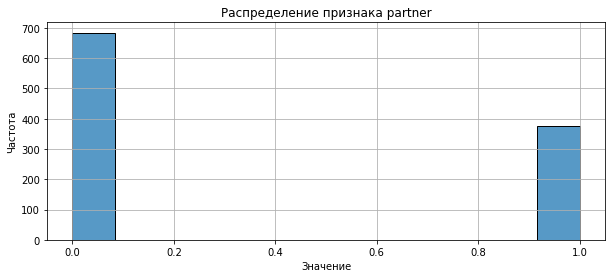

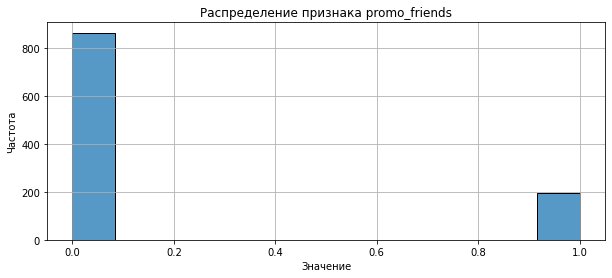

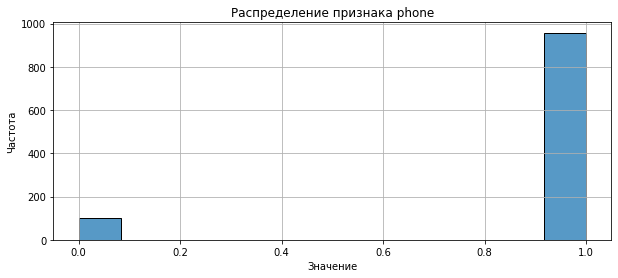

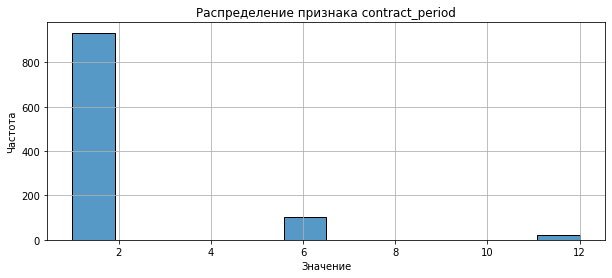

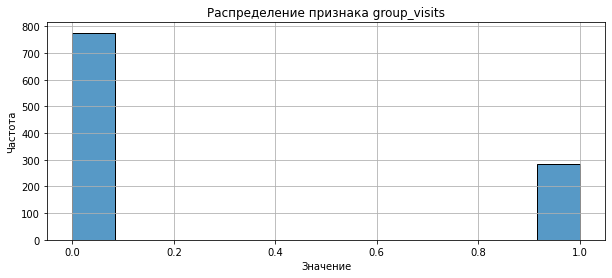

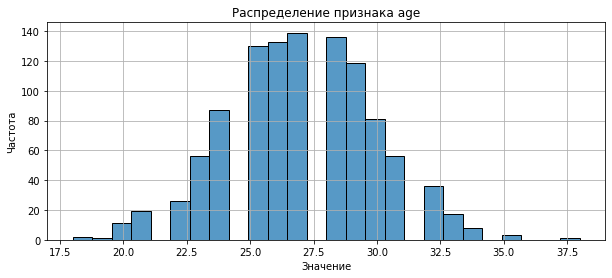

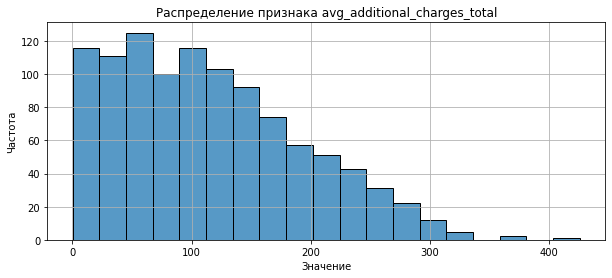

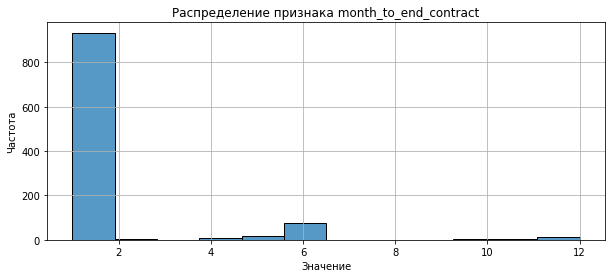

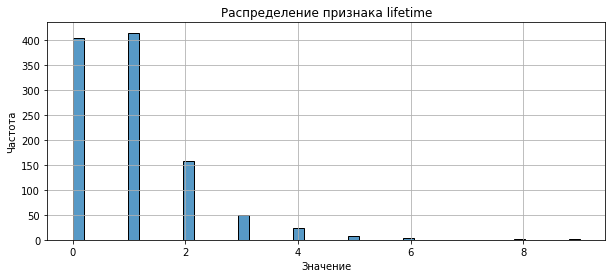

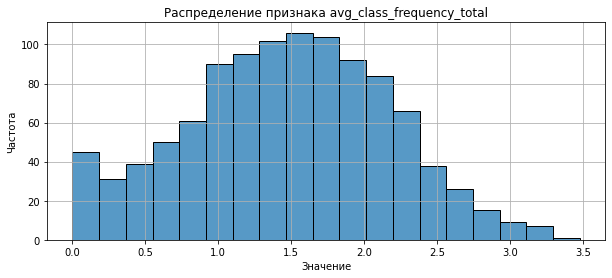

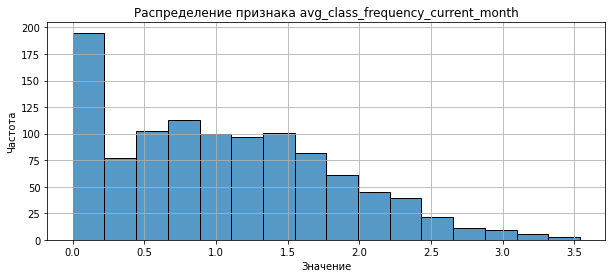

In [38]:
# построим графики для оставшихся клиентов
create_hist(df_churn_1, columns)

Все ранее сделанные выводы подтверждаются графиками

* Ушло примерно одинаковое количество мужчин и женщин, оставшихся примерно такая же пропорция
* Примерно 77% ушедших киентов жили/работали в том же районе, что и находится фитнес-центр, против 87% - оставшихся
* 18% из ушедших пришли по промокоду, оставшиеся - 35%
* У 90% оставшихся и ушедших указан номер телефона
* В среднем у оставшегося клиента длительность договора составляет 5,8 месяцев, а у ушедших - 1,7
* Оставшиеся клиенты больше посещают групповые занятия - 46,4%, против 26,9% у ушедших
* Средний возраст оставшизся - 30 лет, ушедших - 27
* Средние траты у первой группы - 158,45 у.е, у второй - 115,08 у.е
* У первой категории клиентов в среднем договор заканчивается через 5,3 месяца, в второй - 1,7
* Лайфтайм клиента для оставшихся - 4,7 месяцев, ушедших - 1
* В среднем оставшиеся клиенты ходят 2 раза в неделю за весь период, чем ушедшие - 1,5 раз
* В среднем оставшиеся клиенты ходят 2 раза в неделю за последний месяц, чем ушедшие - 1 раз

## Постройте матрицу корреляций и отобразите её.

In [39]:
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


* Видим, что высокая зависимость между длительность абонемента и месяцем окончания абонемента
* Также высокая хависимость между параметрами "Среднее посещение в прошедшем месяце" и "Среднее посещение за все время"

Удалим оба столбца, т.к. это мультиколлинеарность, что в свою очередь нам будет мешать при ML

In [40]:
df = df.drop(['contract_period', 'avg_class_frequency_total'], axis = 1)

<div class="alert alert-success">
✔️ Хорошо) Вообще в логистической регрессии автоматически стоит регуляризация l2, которая борется с влиянием мультиколлинеарности, а случайный лес не подвержен этому влиянию, но удаление это тоже хороший вариант)

В любом случае очень хорошо, что ей уделяется внимание

# Шаг 3. Постройте модель прогнозирования оттока пользователей
Постройте модель бинарной классификации пользователей, где целевой признак — факт оттока пользователя в следующем месяце

## Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

In [41]:
# разделим данные на признаки и целевую переменную
X = df.drop('churn', axis = 1)
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Обучите модель на train-выборке двумя способами: логистической регрессией и случайным лесом

In [42]:
# зададим список моделей
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

## Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [43]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(random_state=0)
Accuracy:0.90 Precision:0.79 Recall:0.80
RandomForestClassifier(random_state=0)
Accuracy:0.91 Precision:0.83 Recall:0.79


Видим, что у обоих моделей доля правильных ответов составляет 90-91%. Точность выше у Леса, а полнота у Логической регрессии.
В совокупности, Лес опередает Логическую регрессию

<div class="alert alert-success">
✔️ Хорошая работа

# Шаг 4. Сделайте кластеризацию пользователей
Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (пользователей):
## Стандартизируйте данные.

In [44]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. На основании полученного графика предположите, какое количество кластеров можно выделить.

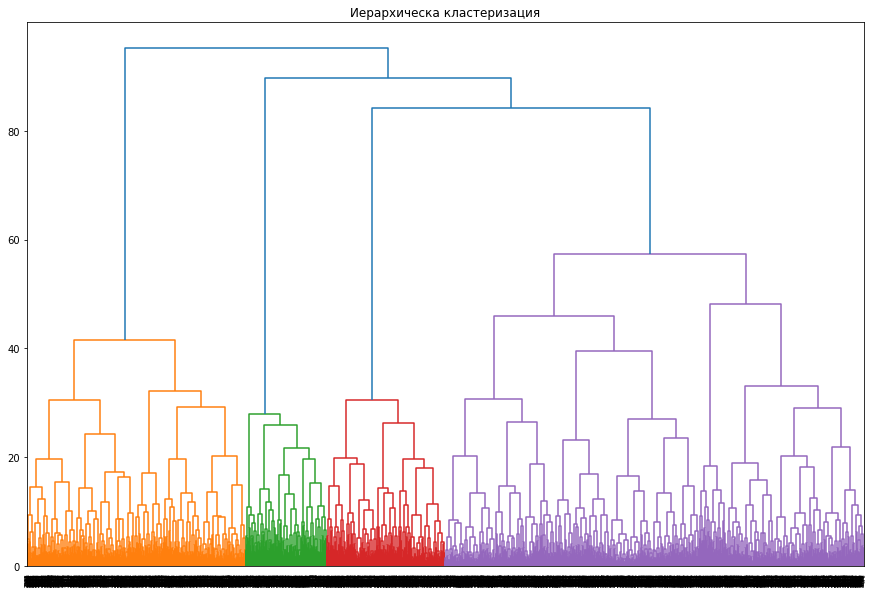

In [45]:
linked = linkage(X_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическа кластеризация')
plt.show() 

По графику хорошо видны 4 кластера

## Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [46]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

## Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [47]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.511194,1.000000,0.226368,0.114428,0.899254,0.182836,26.807214,111.073289,1.715174,1.420398,0.978977,0.741294
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.550481,0.998798,0.274038,0.075721,0.897837,1.000000,30.248798,155.206260,4.707933,4.483173,2.043261,0.092548


Результаты кластеризации:
"0": живут/ работают недалеко от фитнес-центра; почти все сотрудники компаний-партнера фитнес-центра; пришедшие исключительно по промокоду от друга; больше всех ходят на групповые занятия (53%); возраст около 29-30 лет; в среднем тратят 154 у.е.; абонемент заканчивается чуть более чем через 6 месяцев; жизненный цикл клиентов около 4 месяцев; среднее посещение в неделю за  месяц около 2 раз; отток 10%

"1": живут/ работают недалеко от фитнес-центра; только 38% являются сотрудниками компаний-партнера; всего около 5% пришли по промокоду; почти у всех указан телефонный номер; абсолютно никто не ходит на групповые занятия; возрост 30 лет; средние траты выше всех - 174 у.е.; абонемент заканчивается через 4,7 месяцев; жизненный цикл клиент 5 иесяцев; среднее посещение уверенно 2 раза в неделю; отток 4,7%

"2": все живут/работаю в районе расположения фитнес-центра; мало сторудников компаний-партнеров фитнец-центра; мало кто пришел по промокоду от друга (11%); мало ходят на групповые занятия (18%); самая молодая группа - средний возраст 26-27 лет; в среднем тратят меньше всех - 111 у.е.; абонемент закончится раньше всез, через 1,7 месяца;  "новички" в клубе - лайфтайм 1,4 месяца; реже всех ходят в фитнес-центр; отток 74%

"3": не живут/работаю в том же районе где и фитнес-центр; почти половина из них являются сотрудниками компаний-партнеров (49%); по промокоду пришли тлько 7%; на групповые занятия ходят только 23%; средний возраст 28-29 лет; средние траты 137 у.е; абонемент закончится через 2,8 месяца; первое посещение было 3 месяца назад; в среднем ходят в зал 1,6 раз в неделю; отток 40%

"4": живут/работаю в том же районе где и фитнес-центр; 27% являются сотрудниками компаний-партнеров (49%); по промокоду пришли только 7,6%; посещяют только групповые занятия; в среднем возраст 30 лет; средние затраты 155 у.е.; 4,7 месяца до окончания абонемента; пришли в фитнес-центр 4,5 месяца назад; среднее посещение фитнес-центра 2 раза в неделю; отток 9%

## Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [48]:
clusters = df.groupby('cluster_km').mean()
clusters

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.511194,1.000000,0.226368,0.114428,0.899254,0.182836,26.807214,111.073289,1.715174,1.420398,0.978977,0.741294
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.550481,0.998798,0.274038,0.075721,0.897837,1.000000,30.248798,155.206260,4.707933,4.483173,2.043261,0.092548


In [49]:
columns = df.drop(columns=['cluster_km']).columns.tolist()
def cluster_hist(df, columns):
    for i in columns:
        print(f'Параметр {i}')
        for j in sorted(df['cluster_km'].unique()):
            df_claster = df[df['cluster_km'] == j]
            plt.figure(figsize =(10, 4))
            sns.histplot(df_claster[i])
            plt.ylabel('Частота')
            plt.xlabel('Cluster:'+ str(j))
            plt.title(i)
            plt.grid()
            plt.show()

Параметр gender


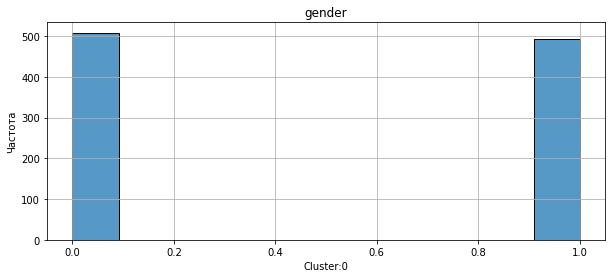

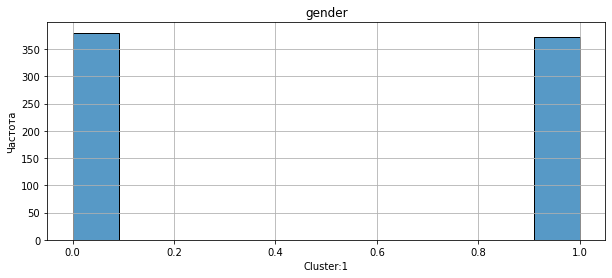

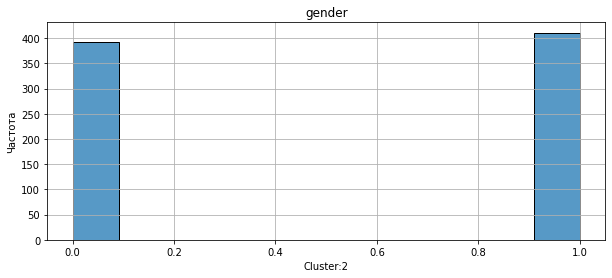

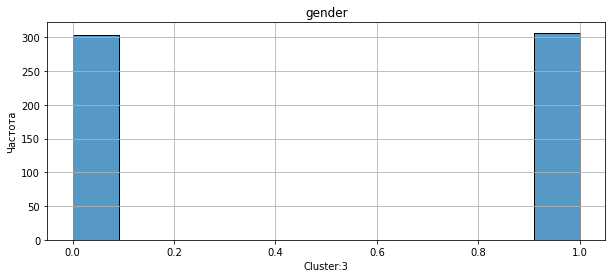

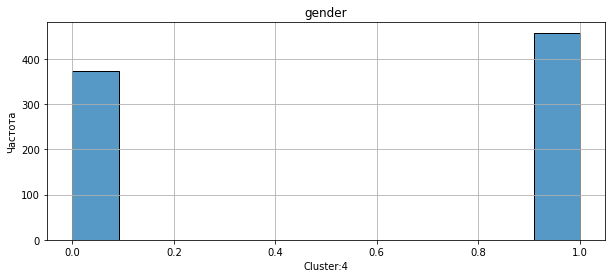

Параметр near_location


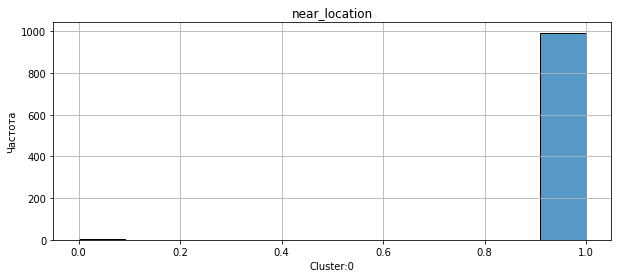

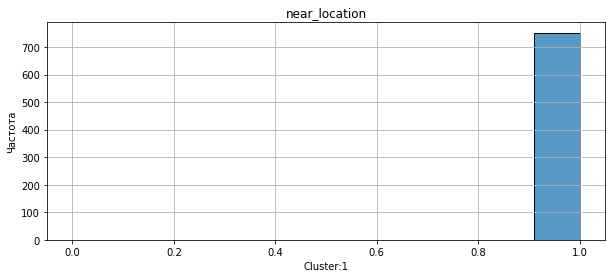

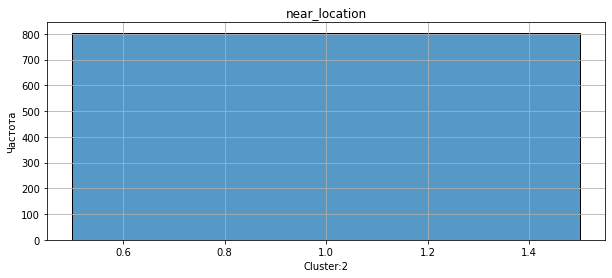

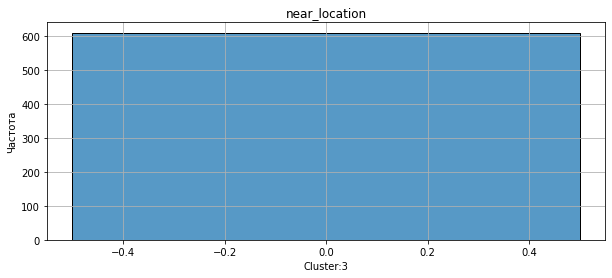

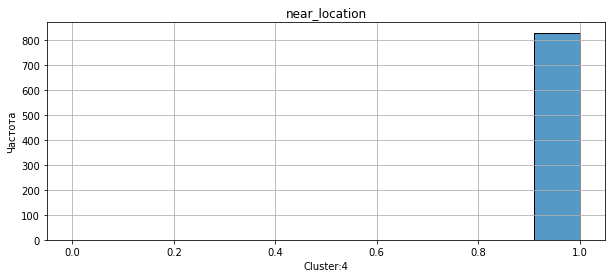

Параметр partner


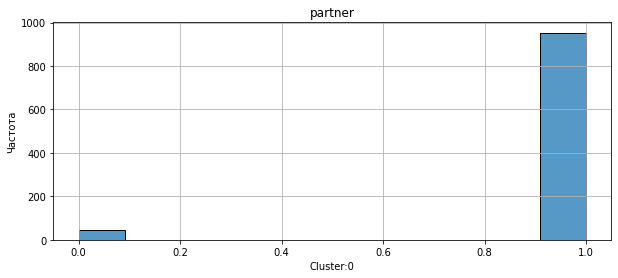

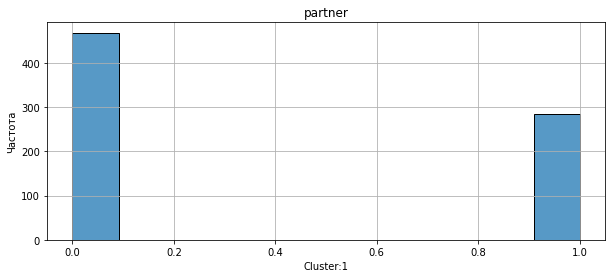

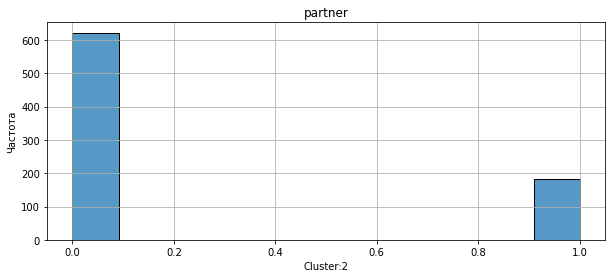

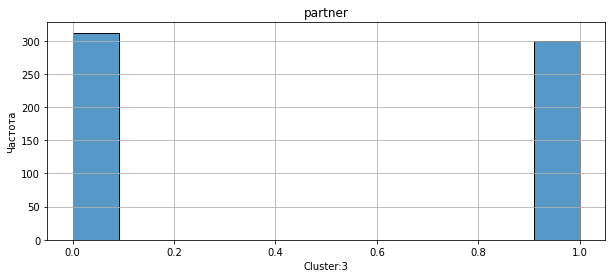

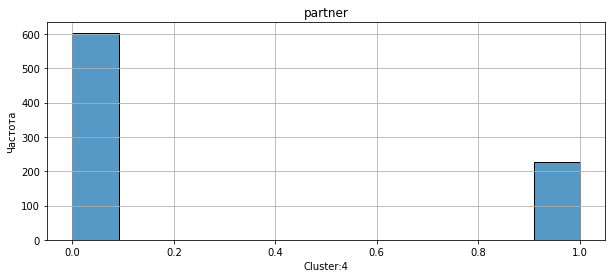

Параметр promo_friends


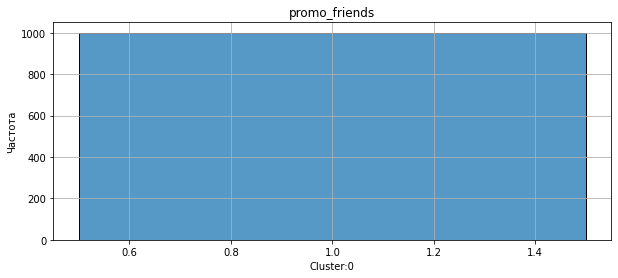

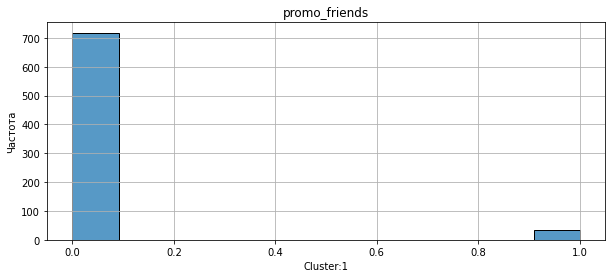

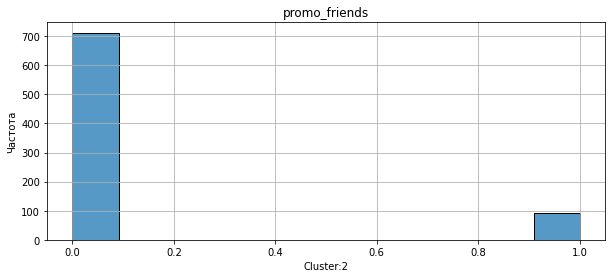

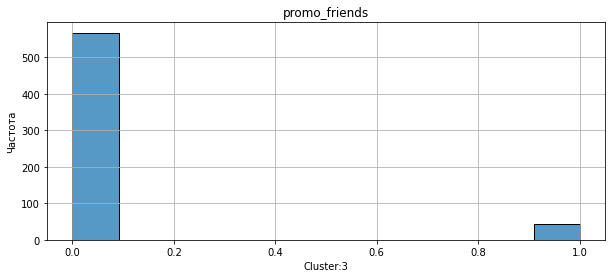

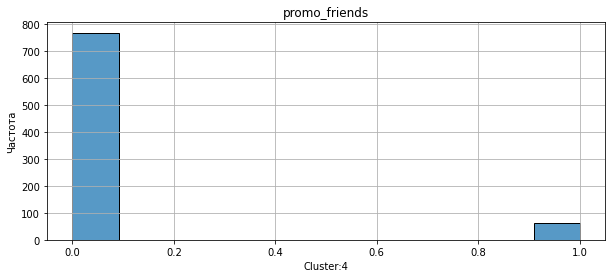

Параметр phone


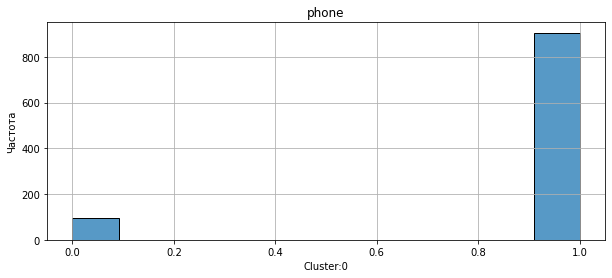

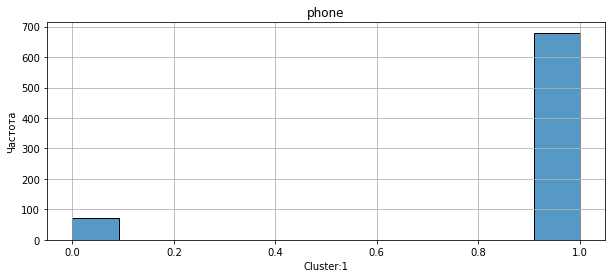

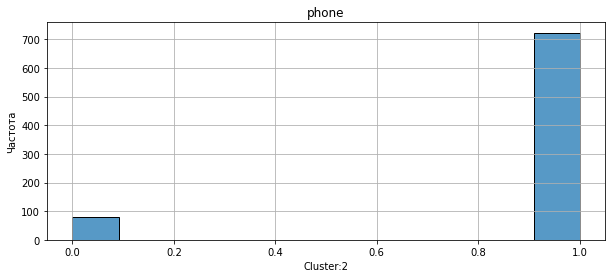

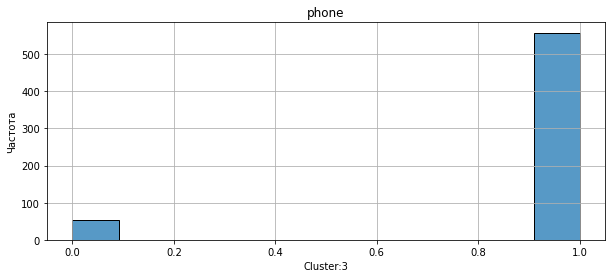

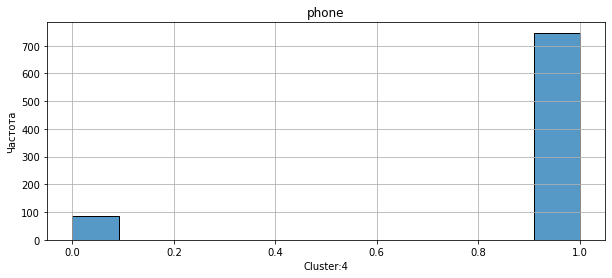

Параметр group_visits


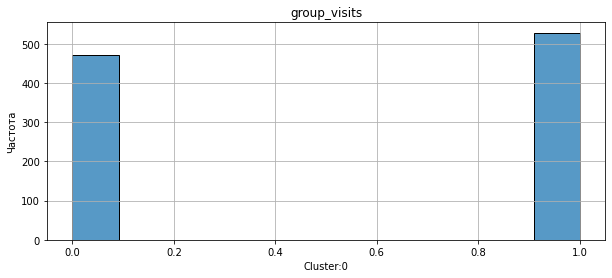

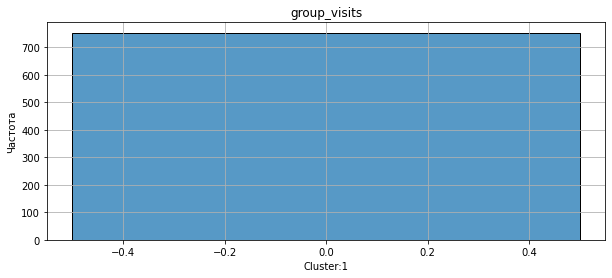

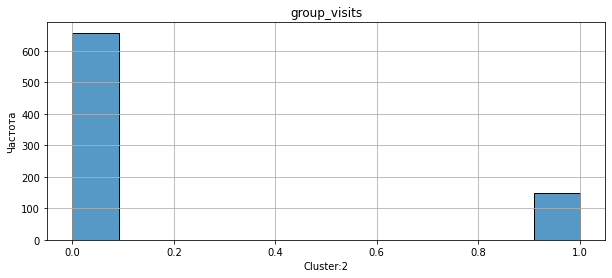

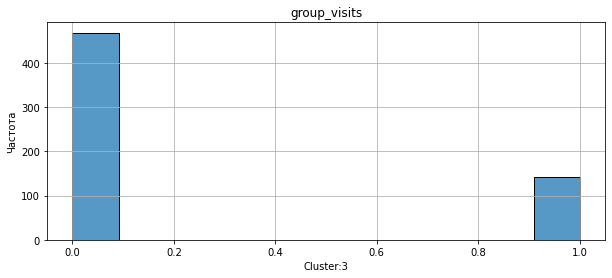

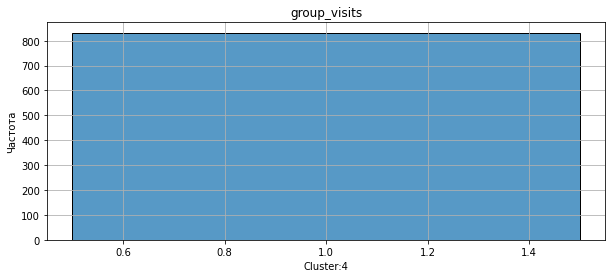

Параметр age


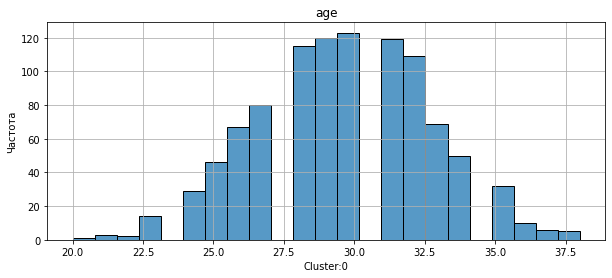

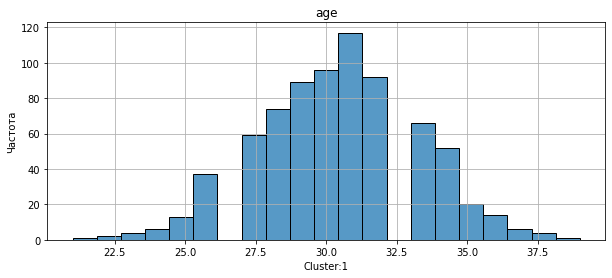

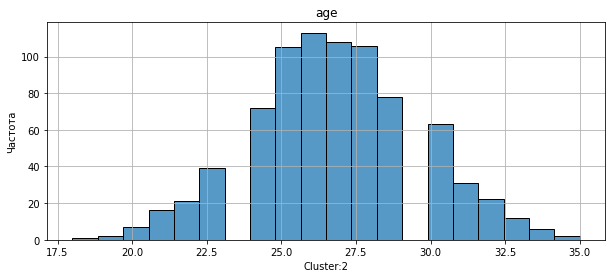

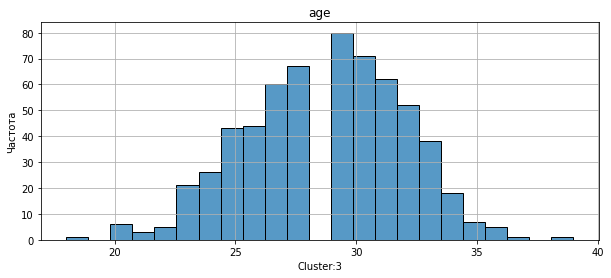

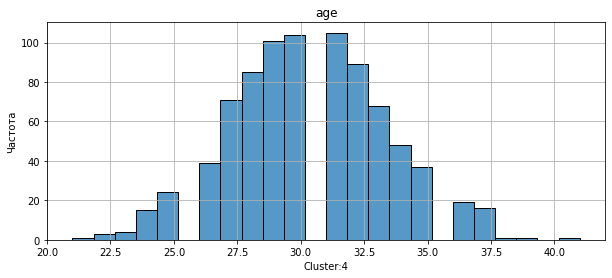

Параметр avg_additional_charges_total


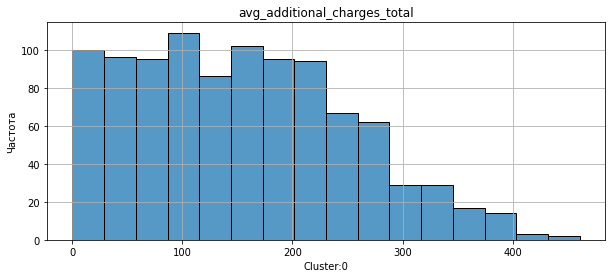

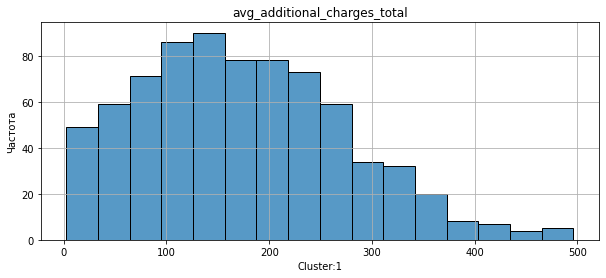

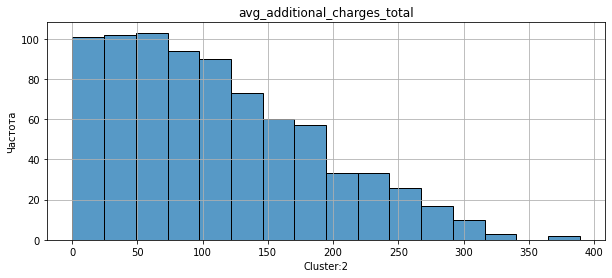

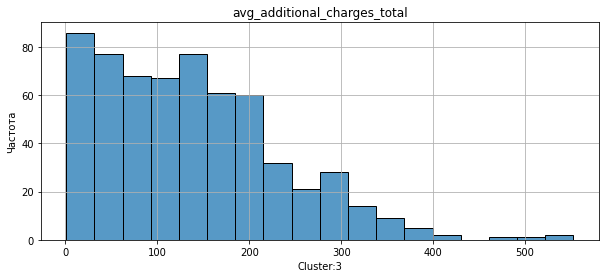

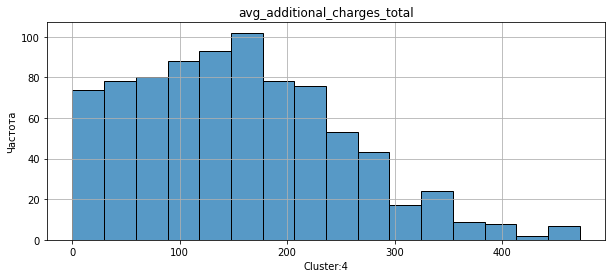

Параметр month_to_end_contract


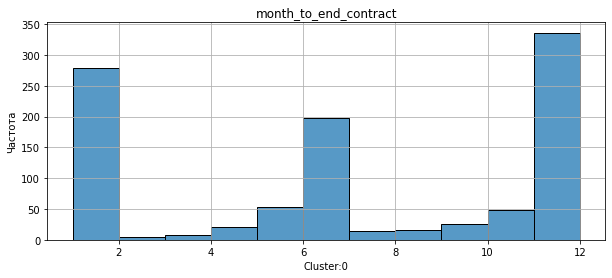

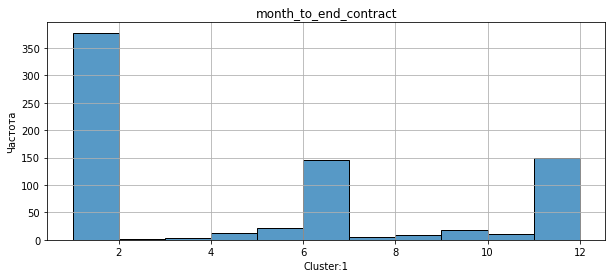

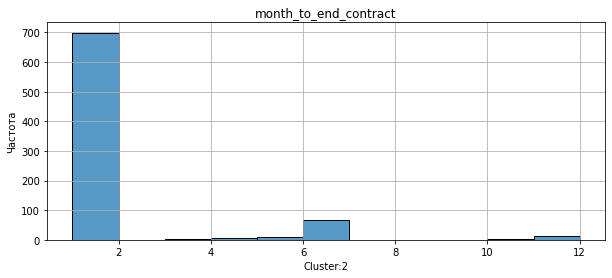

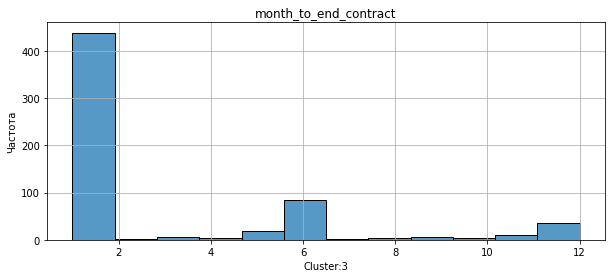

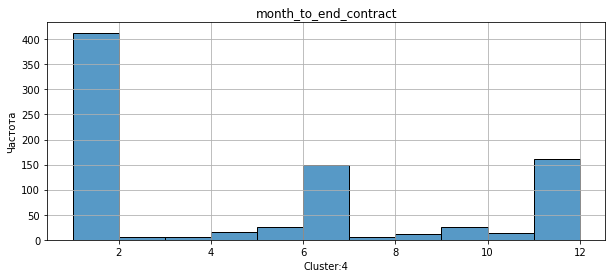

Параметр lifetime


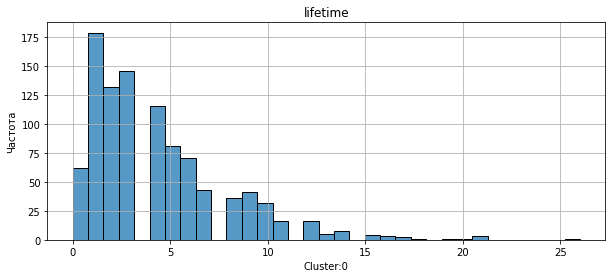

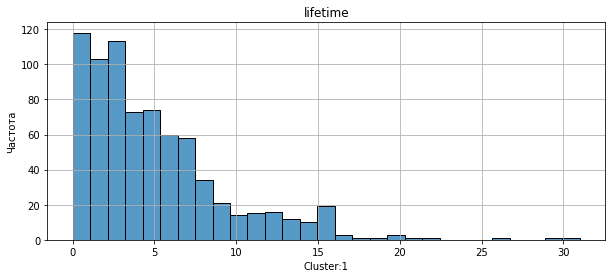

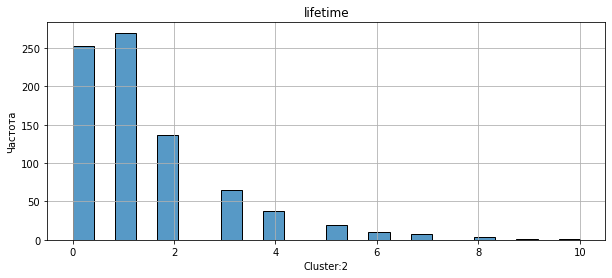

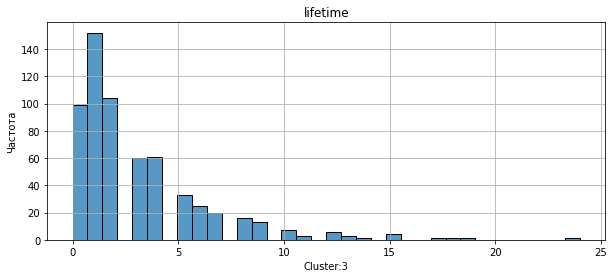

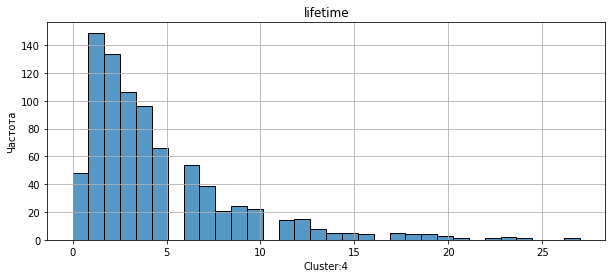

Параметр avg_class_frequency_current_month


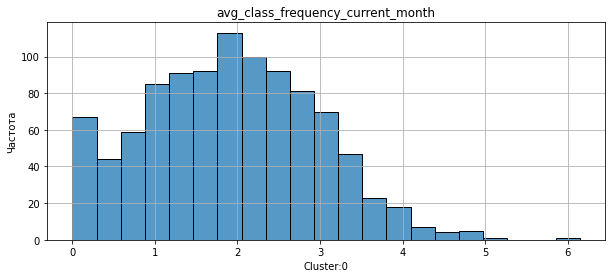

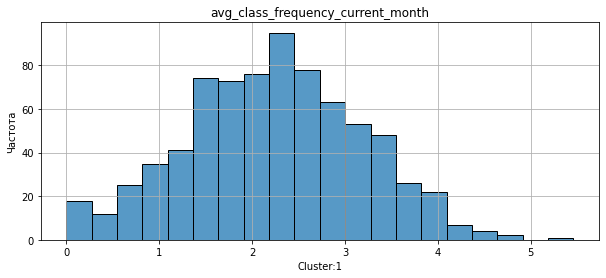

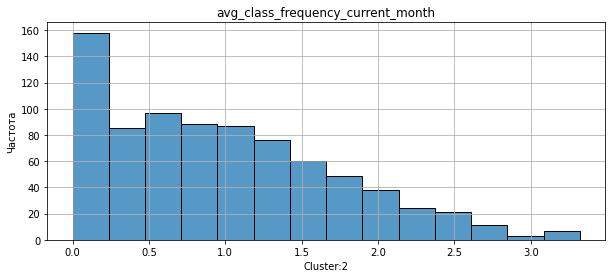

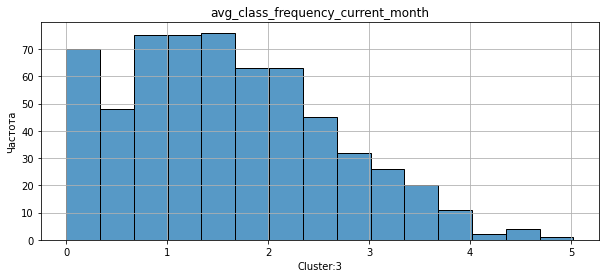

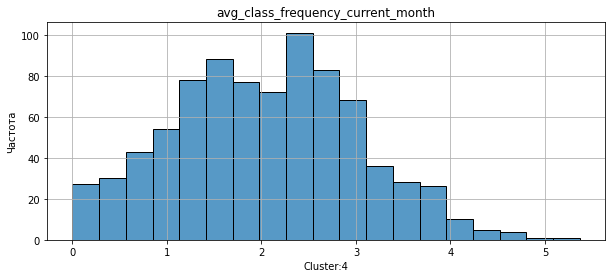

Параметр churn


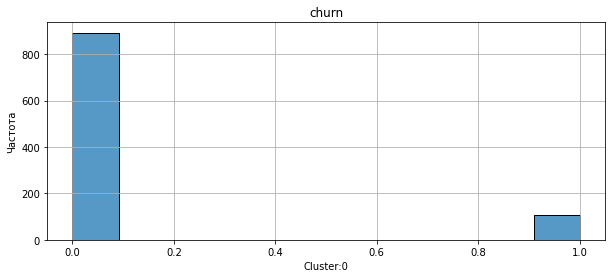

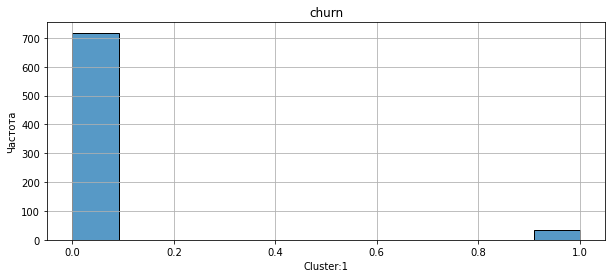

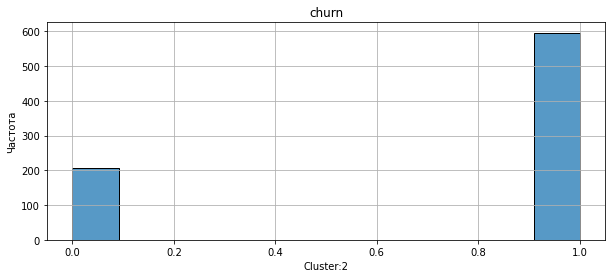

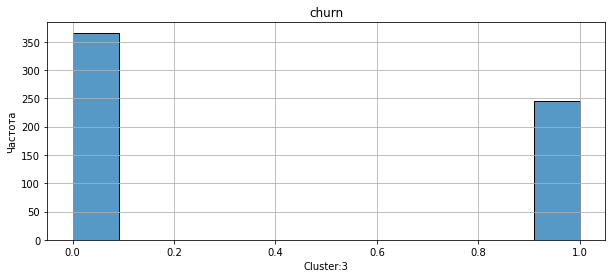

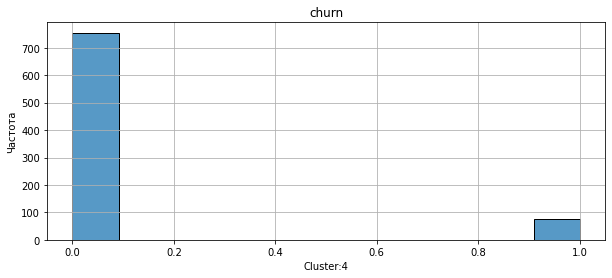

In [50]:
cluster_hist(df, columns)

Выводы по параметрам:
* gender: Как сообщалось ранее, в целом распределение равное, но в 4 кластере все же преобладает пол -1 на 30-60 человек
* near_location: В кластерах 0, 1, 2, 4 клиенты живут/работают в том же районе, что и фитнес центр, что касается 3-го, то клиенты не живут/работают в том же районе
* partner: В клатере 0 - почти все клиенты являются сотрудниками партнеров-компаний (95%), в 3-ем - 49%, в остальных менее 40%; наименьшее значение - во втором (23%)
* promo_friends: кластер 0 - все клиенты пришли по промокоду от друга, во всех остальных, процент таких клиентов не превышает 12%; меньше всего в 3 кластере
* phone: почти у всех клиентов в каждом класетере указан телефонный номер. Значение не падает ниже 90%
* group visits: кластер 1 - клиенты не посещают группровые занятия, 4 - клиенты посещают групповые занятия, кластеры 0,2,3 посещают в той или иной мере: 0- 53% клиентов, 2 - 18%, 3 - 23%
* age: самый возрастной кластер - 1,4 (30 лет), самый молодой- 2 (26 полных лет)
* avg_additional_charges_total: самый "тратящий" кластер - 1 (в среднем тратят 174 у.е), самый "мало тратящий" - 2 (в среднем 111 у.е.)
* month_to_end_contract: долгосрочные клиенты в кластере - 0 (6,7 месяцев), с наименьшим сроком дейтсвия абонемента - 2 (1,7 месяца)
* lifetime: самый большой лайфтайм у 1 кластера (5,1 месяц), самый маленький у 2 (1,4 месяца)
* avg_class_frequency_current_month: кластеры с наиболее посещаемыми клиентами - 1,4 (2), с реже посещающими - 2 (1 раз)
* churn: наибольший отток в кластере 2 (74%), наимеьший в 1 (5%)

## Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [51]:
churn_fraction = df.groupby('cluster_km')['churn'].agg('sum') / df.groupby('cluster_km')['churn'].count()
churn_fraction

cluster_km
0    0.108000
1    0.046481
2    0.741294
3    0.400982
4    0.092548
Name: churn, dtype: float64

Видим, что как 2й кластер был самым отточным, так он и остался (74%), наименее отточный - 1 (5%)

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

Можно выделить следующие типы клиентов:
1. Устойчивые клиенты без посещения групповых занятий. Отток таких клиентов составляет 5%. Основные характеристики: 
    * Живут/работают в том же районе, что и фитнес центр
    * В основном не являются сотрудниками компаний-партнёров клуба (только 37% являются сотрудниками партнеров)
    * Только 4,6% пришли по промокоду от друга
    * Не посещают групповые занятия
    * Возраст - 30 лет
    * Много вкладывают на сопутствующие услуги (174 у.е)
    * Берут абонемены в среднем на год (10 месяцев)
    * Лайфтайм 5 месяцев
    * Посещают фитнес-центр не реже 2х раз в неделю
    
2. Устойчивые клиенты с посещение групповых занятий. Отток 9,3%. Основные характеристики:
    * Живут/работают в том же районе, что и фитнес-центр
    * В основном не являются сотрудниками компаний-партнёров клуба (только 27% являются сотрудниками партнеров)
    * Только 7,6% пришли по промокоду от друга
    * Посещают групповые занятия
    * Возраст 30 лет
    * Средние затраты на сопутствующие услуги (155 у.е)
    * Берут абонемент в среднем на год (10 месяцев)
    * Лайфтайм 4,5 месяца
    * Стабильное посещение- 2 раза в неделю
3. Устойчивые клиенты с частичным посещение групповых занятий. Отток 11%. Основные характеристики:
    * Живут/Работают в том же районе, что и фитнес-центр
    * Являются сотрудниками компаний-партнеров клуба (95%)
    * Все пришли по промокоду от друга
    * Половина посещают групповые занятия (53%)
    * Возраст 29 полных лет
    * Средние затраты на сопутствующие услуги (154 у.е.)
    * Абонемент в среднем на год (11 месяцев)
    * Лайфтайм 4,3 месяца
    * Посещают в среднем 2 раза в неделю
4. Средне-устойчивые клиенты. Отток 40%. Основные характеристики:
    * Не живут/работают в том же районе, что и фитнес-центр
    * Половина из них являются сотрудниками компаний-партнеров клуба (49%)
    * Мало из них пришли по приглашению от друзей (7%)
    * Неохотно посещают групповые занятия (23%)
    * Возраст 28 полных лет
    * Ниже-средние затраты на сопутствующие услуги (137 у.е.)
    * Берут обонементы на 6 месяцев
    * Лайфтайм 3 месяца
    * В среднемем ходят в клуб 3 раза в 2 недели, т.е. 1,5 раза в неделю
5. Наименее устойчивые клиенты. Отток 74%. Основные характеристики:
    * Живут/работают в том же районе, что и фитнес-центр
    * Мало клиентов сотрудников компаний-партнеров клуба (22%)
    * Только 11% пришли по промокоду от друга
    * Меньше всего посещают групповы занятия (18%)
    * Самые молодые - 26 полных лет
    * Меньше всех тратят на сопутствующие услуги (111 у.е)
    * Абонемент в среднем на 3 месяца
    * Лайфтайм 1,4 месяца
    * Посещают клуб в среднем 1 раз в неделю

**Вывод**:
* Территориальное расположение фитнес центра в целом не влияет на клиентов
* Сотрудники компаний-партнеров клуба больше занимаются и тратят деньги на сопутствующие услуги.
* Промокод никак не влияет на отток
* Посещение групповых занятий никак не влияет на отток
* Чем взрослей клиент, тем абонемент больше, чаще ходит и больше тратит
* Чем Лайф тайм выше, тем больше тратит, чаще ходит в клуб

Предложения по стратегии:
Сделать акцент на молодых клиентах (речь идет о возрасте и о лайфтайме):
* Снизить стоимость абонемента. Может быть в силу ограниченных ресурсов, такие клиенты не могу позволить себе купить абонемент на большой срок. Например сделать скидки для молодых клиентах. 
* Сделать рекламу более молодежной, например вести аккаунты в соц. сетях
* Сделать интерьер более интересным. Людям нужен хороший визуал для тяги к таким местам
* Проведение бесплатных общеклубовых мероприятий, например, тренингов от известных тренеров, медийными личностями, предложить поучаствовать в фотосессиях клуба и т.п.
* Тренерам предложить вести учет физических показателей клиентов, чтобы показывать релаьный результат, который в свою очередь мотивирует.
* При снижении количества посещений, пообщаться с ним индивидуально, уточнить в чем причина, при необходимости предложить совет, помощь.